This Notebook is an attempt to show how R can be used for simple exploratory analysis on a Dataset with multiple Categorical Variables as well as Date data

In [1]:
#Load Required Libraries
library(readr)
library(dplyr)
library(magrittr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
#Import the Data, you can use the 'stringsAsFactors = TRUE' argument if you wish
raw_data <- read.csv("C:/Users/Steve/Desktop/Portfolio/Datasets/Industrial Safety and Health Analytics Data/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")

###  Data exploration to help us understand the dataset

In [3]:
#Preview the first 6 observations of the dataset
head(raw_data)

,X,Data,Countries,Local,Industry.Sector,Accident.Level,Potential.Accident.Level,Genre,Employee.or.Third.Party,Critical.Risk,Description
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
2,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
3,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of â€‹â€‹the left foot of the collaborator causing the injury."
4,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. CristÃ³bal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
5,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric FernÃ¡ndez-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."
6,5,2016-01-12 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,"During the unloading operation of the ustulado Bag there was a need to unclog the discharge mouth of the silo truck. In performing this procedure, there was a maneuver of unhooking the hose without the total depressurisation of the mouth, projecting ustulado powder in the collaborator caused irritation in the eyes."


In [4]:
#Get summary statistics of the dataset
summary(raw_data)

       X             Data            Countries            Local          
 Min.   :  0.0   Length:425         Length:425         Length:425        
 1st Qu.:118.0   Class :character   Class :character   Class :character  
 Median :226.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   :224.1                                                           
 3rd Qu.:332.0                                                           
 Max.   :438.0                                                           
 Industry.Sector    Accident.Level     Potential.Accident.Level
 Length:425         Length:425         Length:425              
 Class :character   Class :character   Class :character        
 Mode  :character   Mode  :character   Mode  :character        
                                                               
                                                               
                                                               
    Genre           Employee.or.Th

In [5]:
#Convert the dataset to a data table to allow for enhanced operations
raw_data <- data.table::as.data.table(raw_data)

In [6]:
#Confirm data type of the dataset and it's variables
str(raw_data)

Classes 'data.table' and 'data.frame':	425 obs. of  11 variables:
 $ X                       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Data                    : chr  "2016-01-01 00:00:00" "2016-01-02 00:00:00" "2016-01-06 00:00:00" "2016-01-08 00:00:00" ...
 $ Countries               : chr  "Country_01" "Country_02" "Country_01" "Country_01" ...
 $ Local                   : chr  "Local_01" "Local_02" "Local_03" "Local_04" ...
 $ Industry.Sector         : chr  "Mining" "Mining" "Mining" "Mining" ...
 $ Accident.Level          : chr  "I" "I" "I" "I" ...
 $ Potential.Accident.Level: chr  "IV" "IV" "III" "I" ...
 $ Genre                   : chr  "Male" "Male" "Male" "Male" ...
 $ Employee.or.Third.Party : chr  "Third Party" "Employee" "Third Party (Remote)" "Third Party" ...
 $ Critical.Risk           : chr  "Pressed" "Pressurized Systems" "Manual Tools" "Others" ...
 $ Description             : chr  "While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen t

### After Inspecting the dataset, Remove variables that aren't needed, and convert the variables into the correct data type

In [7]:
#Drop the X variable
raw_data <- select(raw_data, - X)

In [8]:
#Convert grouped Variables to Correct Data type
raw_data %<>% mutate_if(is.character,as.factor)

In [9]:
#Convert Description Variable to character
raw_data$Description <- as.character(raw_data$Description, as.character)

In [10]:
#Convert Data Variable to Date, and change the column name to Date
raw_data$Data <- strptime(raw_data$Data, "%Y-%m-%d %H:%M")

In [11]:
#Rename Data and Genre columns
library(data.table)
setnames(raw_data, c("Data", "Genre"), c("Date", "Gender"))


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last




In [12]:
#Inspect Data for missing values
vis_miss(raw_data[,2:9])

ERROR: Error in vis_miss(raw_data[, 2:9]): could not find function "vis_miss"


### Test for Relations between the variables using contigency tables

In [13]:
#Relations between Country and Accident Level
table(raw_data[,2], raw_data[,5])

            
               I  II III  IV   V
  Country_01 180  19  21  23   8
  Country_02  99  19   7   5   0
  Country_03  37   2   3   2   0

In [14]:
#Relations between Industry Sector and Accident Level
table(raw_data[,4], raw_data[,5])

        
           I  II III  IV   V
  Metals 107  12   7   7   1
  Mining 167  26  20  21   7
  Others  42   2   4   2   0

In [15]:
#Aggregating Data
ct <- raw_data %>%
  group_by(Countries, Industry.Sector) %>%
  count(Gender)
head(ct)

Countries,Industry.Sector,Gender,n
<fct>,<fct>,<fct>,<int>
Country_01,Metals,Female,2
Country_01,Metals,Male,44
Country_01,Mining,Female,4
Country_01,Mining,Male,199
Country_01,Others,Female,1
Country_01,Others,Male,1


### Visual Exploratory Analysis

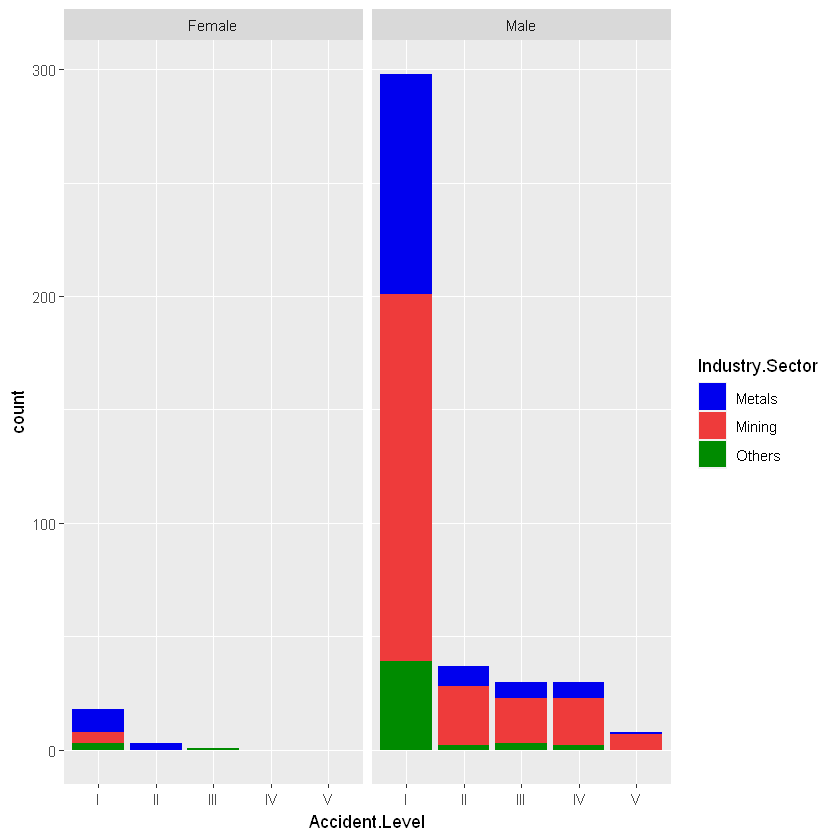

In [16]:
ecols <- c(Mining = "brown2",  Metals = "blue2",
           Others = "green4")

ggplot(raw_data) + 
  geom_bar(aes(x = Accident.Level, fill = Industry.Sector)) + 
  scale_fill_manual(values = ecols) +
  facet_wrap(~ Gender)

In [17]:
#Line Graph for Accident Frequencies by Date
#Convert Date Variable from POSIXlt to POSIXct
raw_data$Date <- as.POSIXct(raw_data$Date, format="%Y-%m-%d")

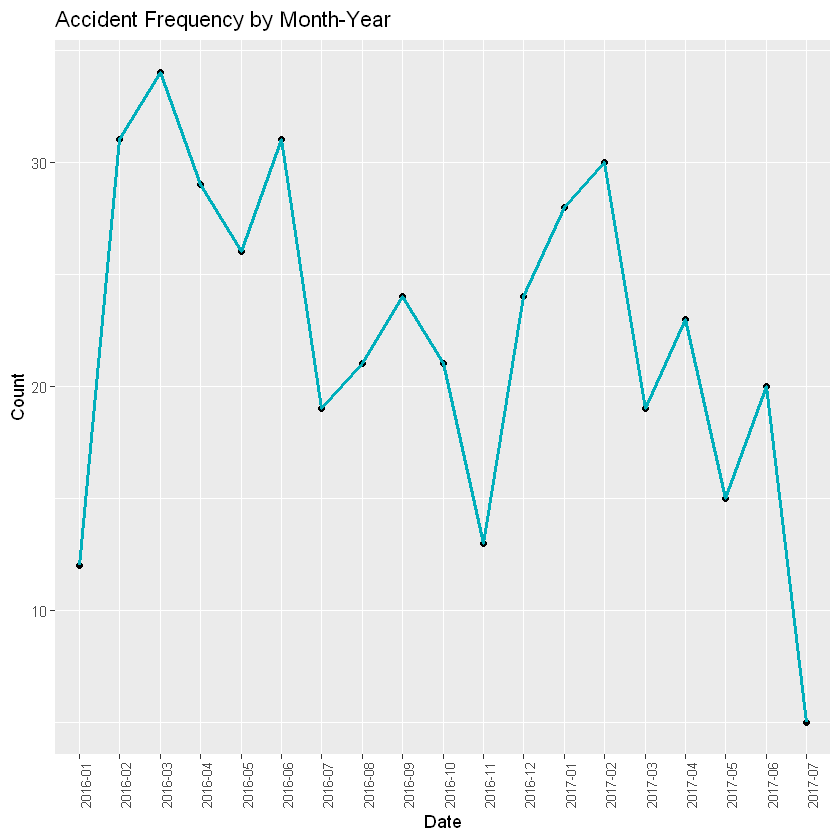

In [18]:
#Create a data frame 
short.date.agg <- raw_data %>%
  mutate(ym = format(Date, "%Y-%m")) %>%
  group_by(ym) %>%
  count()

ggplot(short.date.agg, aes(ym, n, group = 1)) +
  geom_point() + 
  geom_line(color = "#00AFBB", size = 1) + 
  ggtitle("Accident Frequency by Month-Year ") +
  xlab("Date") + ylab("Count") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size =8))

### Sentiment Analysis of the Description Variable

In [19]:
#Load Libraries
library(tidytext)

In [20]:
#Split Variable into words
desc <- strsplit(raw_data$Description, split = " ")
desc <- unlist(desc)

In [21]:
#Remove punctuations
desc <- gsub("[[:punct:][:blank:]]+", "", desc)

In [22]:
#convert text to lowercase
desc <- tolower(desc)

In [23]:
#Remove stop words
desc_df <- data.frame(word = desc)
mb <- anti_join(desc_df, stop_words, by = 'word' )

In [24]:
#Get Word Frequencies
mb %>% count(word, sort = T)

word,n
<chr>,<int>
causing,166
hand,166
left,160
employee,154
,143
operator,122
injury,105
time,101
activity,94


In [25]:
#Get +ve words
positive <- get_sentiments("bing") %>%
  filter(sentiment == "positive")

semi_join(mb, positive, by = "word") %>%
  count(word, sort = TRUE)

word,n
<chr>,<int>
support,58
top,16
master,12
hot,8
clean,7
protection,7
striking,7
positive,6
protective,5


In [26]:
#Get -ve words
negative <- get_sentiments("bing") %>%
  filter(sentiment == "negative")

semi_join(mb, negative, by = "word") %>%
  count(word, sort = T)

word,n
<chr>,<int>
injury,105
falls,31
fall,25
falling,19
allergic,16
wound,16
fell,14
pain,14
sting,14


In [27]:
#Alternative methods for getting +ve & -ve sentiments
bing  <- get_sentiments("bing")

my_sentiment <- mb %>%
  inner_join(bing) %>%
  count(word, sentiment, sort = T)

Joining, by = "word"



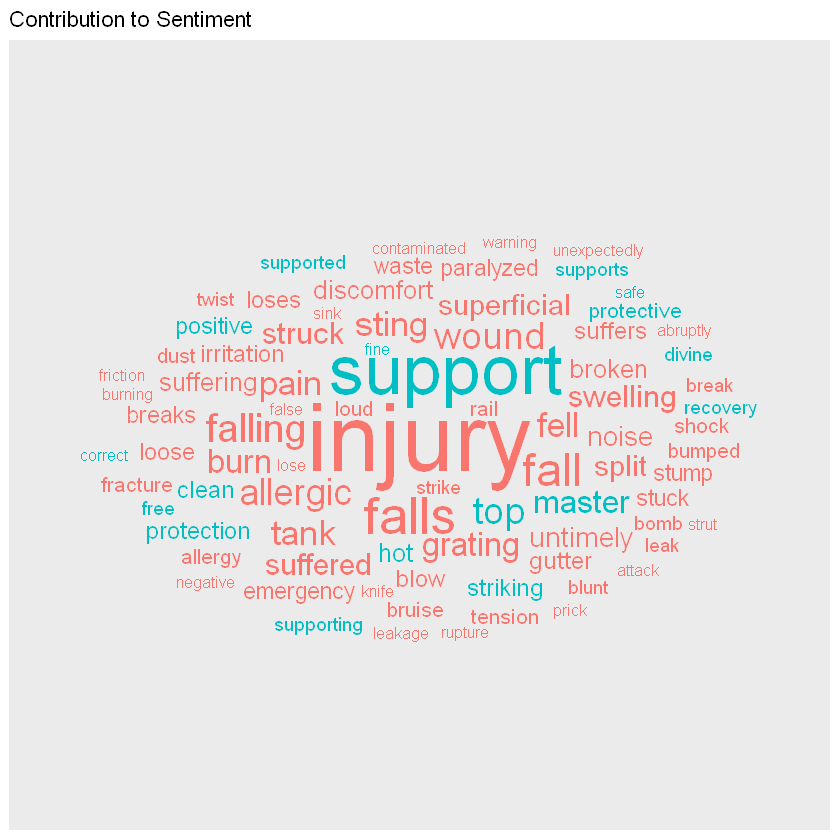

In [28]:
#Word CLoud Visualization
library(ggwordcloud)
my_sentiment %>%
  filter(n>2) %>%
  ggplot(aes(size = n, label = word, color = sentiment)) +
  geom_text_wordcloud() +
  scale_size_area(max_size = 20) +
  ggtitle("Contribution to Sentiment")